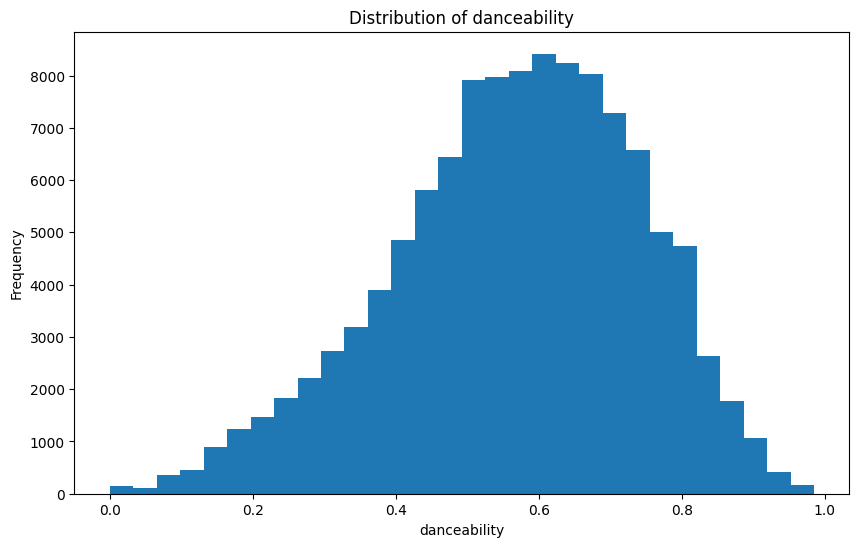

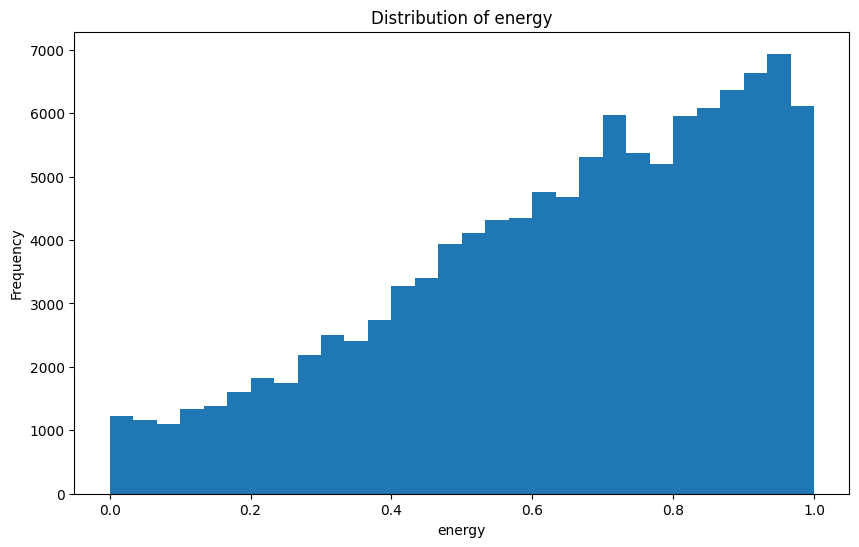

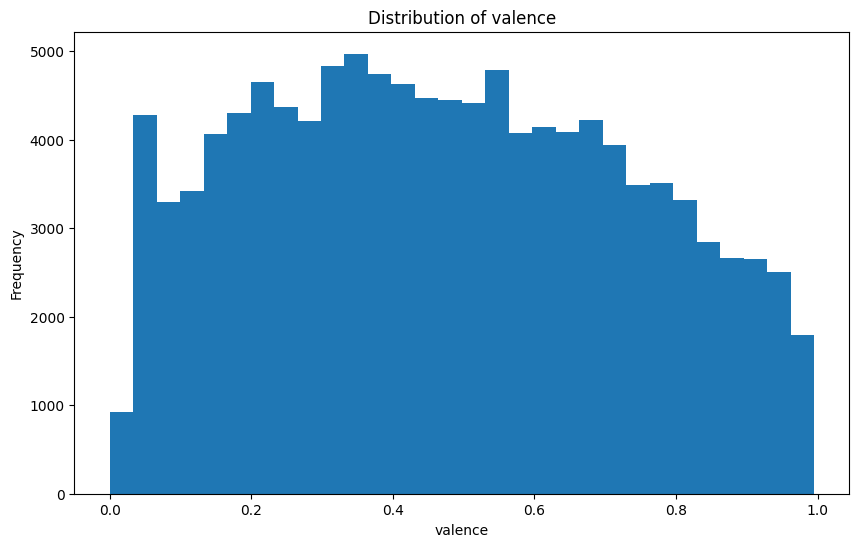

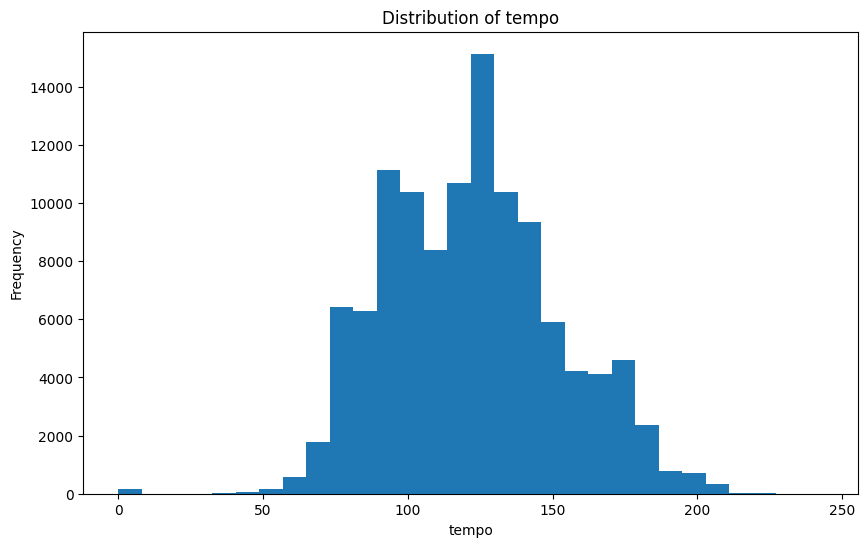

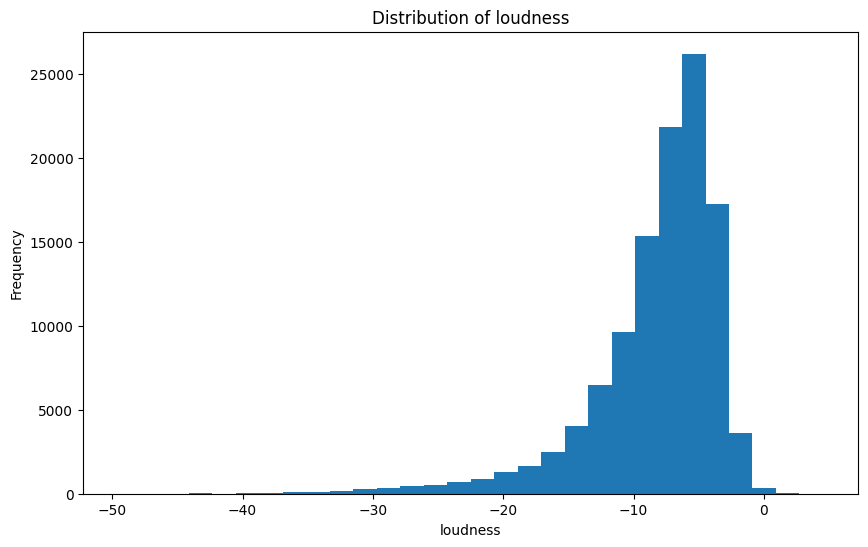

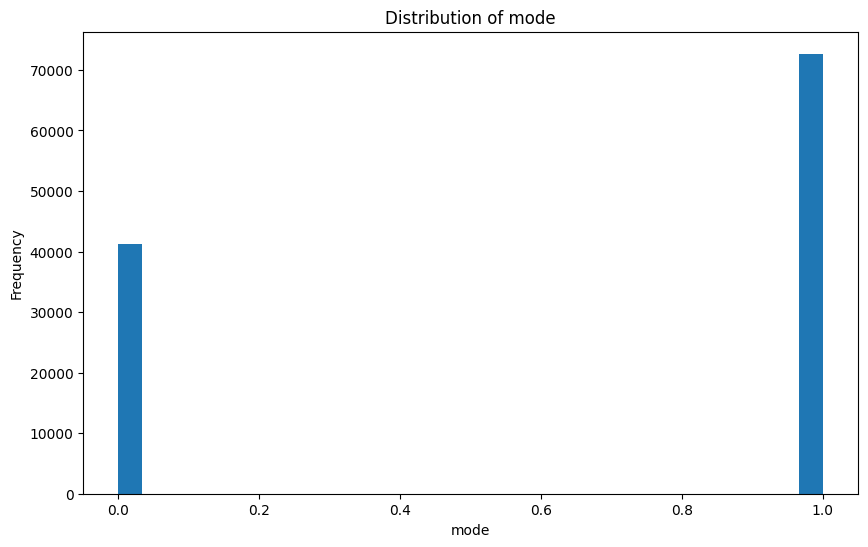

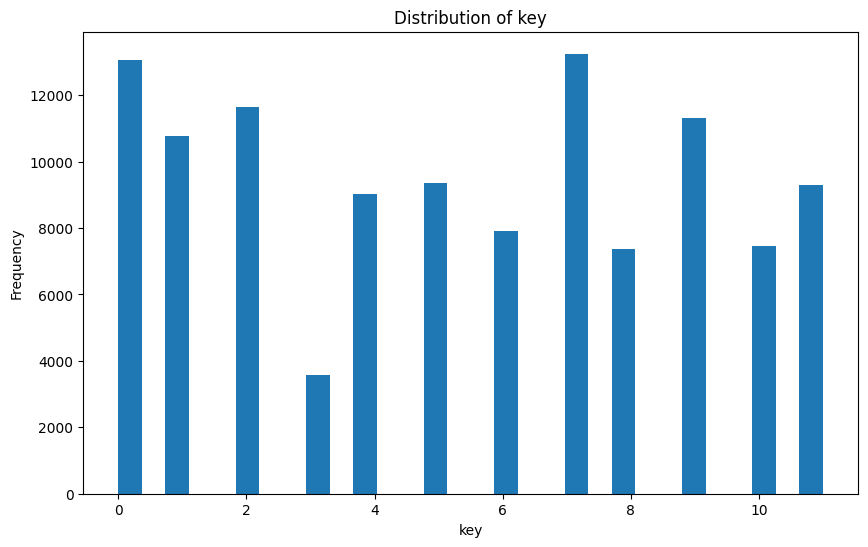

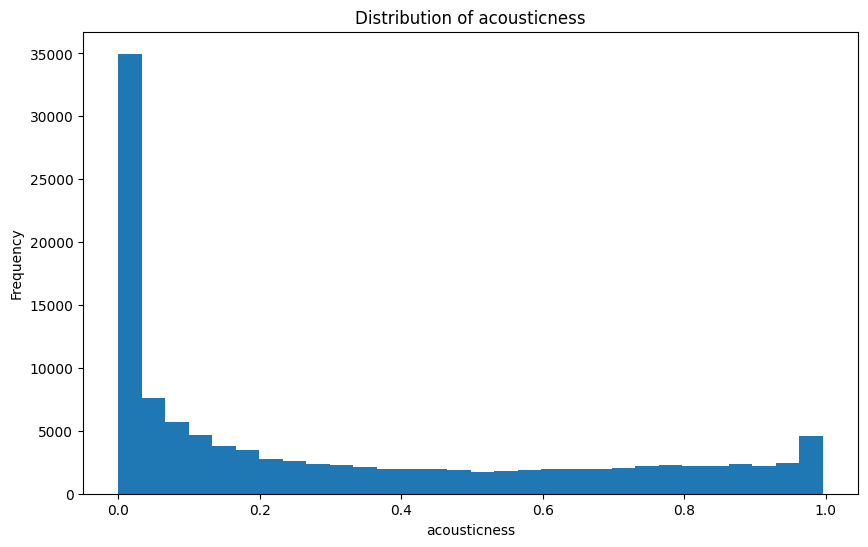

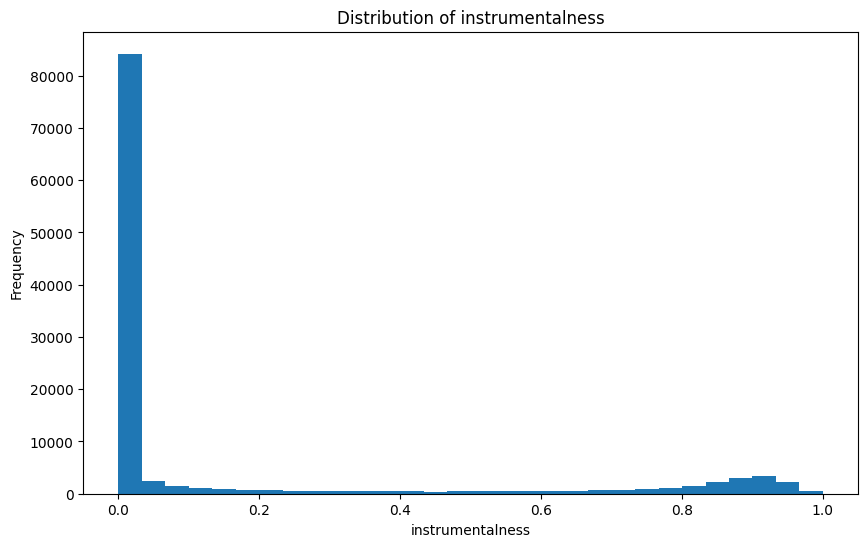

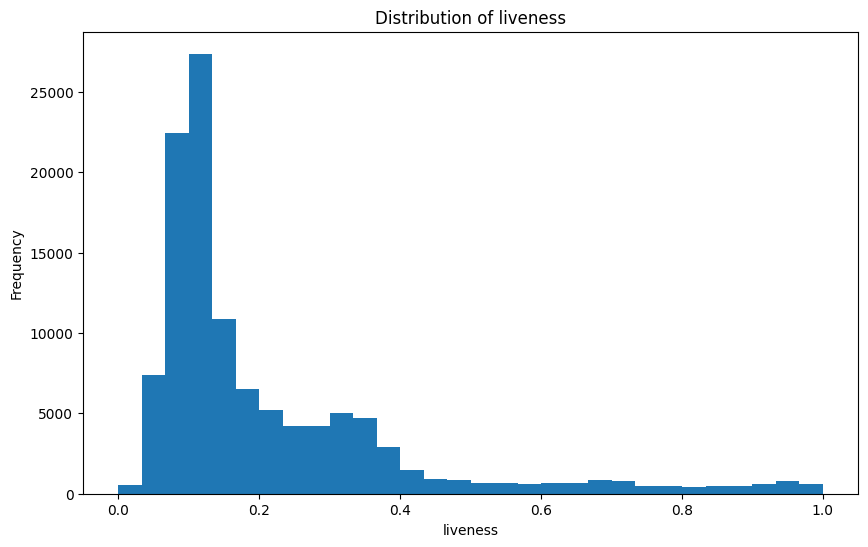

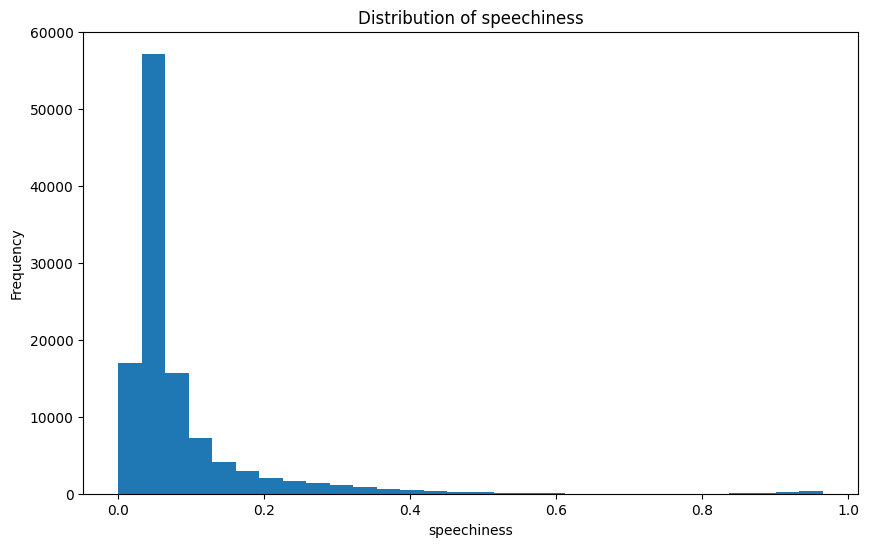

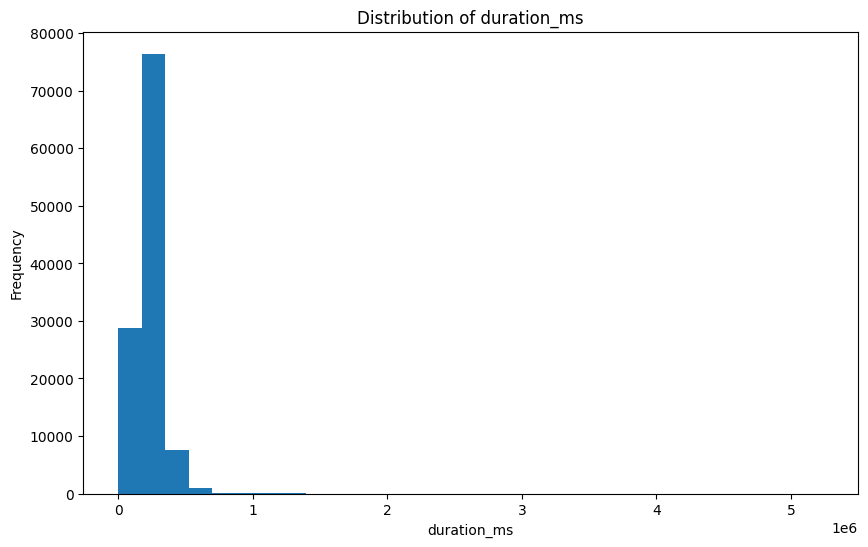

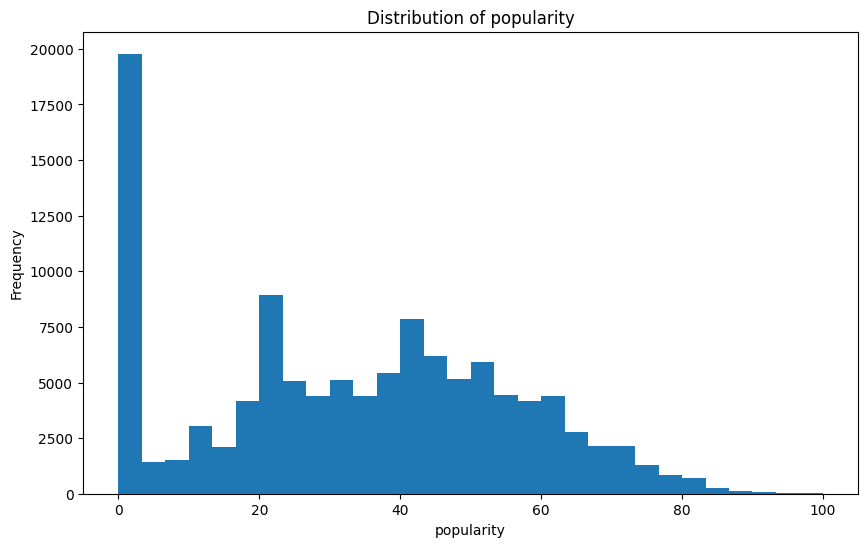

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# List of song characteristics
song_characteristics = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'popularity']

# For each characteristic, plot a histogram
for characteristic in song_characteristics:
    plt.figure(figsize=(10,6))
    plt.hist(df[characteristic].dropna(), bins=30)  # Exclude any missing data
    plt.title('Distribution of '+ characteristic)
    plt.xlabel(characteristic)
    plt.ylabel('Frequency')
    plt.show()


In [12]:
#Are there clusters of songs that are similar in terms of their characteristics?

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset.csv')

song_features = df[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'popularity']]

# Normalize the features
scaler = StandardScaler()
song_features = scaler.fit_transform(song_features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)  # to generalize the data into 10 clusters of songs, can be changed
df['cluster'] = kmeans.fit_predict(song_features)

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=song_features.columns)
print(cluster_centers)


C:\Users\evard\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset.csv')

song_features = df[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'popularity']]

scaler = StandardScaler()
song_features_scaled = scaler.fit_transform(song_features)

kmeans = KMeans(n_clusters=10, random_state=0)  # to generalize the data into 10 clusters of songs, can be changed
df['cluster'] = kmeans.fit_predict(song_features_scaled)

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=song_features.columns)

# Save DataFrame with the cluster centers to CSV file
#cluster_centers.to_csv('cluster_centers.csv', index=False)

print(df)

print(cluster_centers)


C:\Users\evard\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   danceability    energy   valence       tempo   loudness          mode  \
0      0.699706  0.659678  0.557225  124.077641  -7.249538  5.355142e-01   
1      0.687915  0.735973  0.671091  118.571751  -6.084977  6.625349e-01   
2      0.508146  0.337338  0.375316  113.448051 -11.266920  7.890345e-01   
3      0.595386  0.737169  0.331809  125.949967  -8.620200  5.105674e-01   
4      0.407826  0.840496  0.342495  149.412450  -5.184135  7.674587e-01   
5      0.514083  0.752434  0.503398  123.061678  -7.145127  6.822235e-01   
6      0.631517  0.723690  0.546794  120.423159  -6.417155  9.547918e-15   
7      0.347178  0.170231  0.185744  103.138765 -21.275305  6.485128e-01   
8      0.645001  0.699902  0.608714  118.055333  -6.612747  1.000000e+00   
9      0.559834  0.696525  0.429508   99.784904 -11.325651  6.961207e-01   

        key  acousticness  instrumentalness  liveness  speechiness  \
0  5.600398      0.279730          0.030802  0.187429     0.332376   
1  5.646830      0.1773

In [11]:
#Do specific artists prefer to make songs with certain characteristics?
#may specify year, genre, etc
#filter data, contextualize, summarize

import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Group by artist name
grouped = df.groupby('artists')

# Get mean of song characteristics for each artist
mean_characteristics = grouped[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'popularity']].mean()

# Print the means of the characteristics for each artist
print(mean_characteristics)



                                                    danceability    energy  \
artists                                                                      
!nvite                                                    0.8205  0.519000   
"Puppy Dog Pals" Cast                                     0.7050  0.856000   
"Weird Al" Yankovic                                       0.6574  0.575000   
#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs        0.5800  0.494000   
$affie                                                    0.7440  0.178000   
...                                                          ...       ...   
黃仲崑                                                       0.5640  0.533333   
黃妃                                                        0.5500  0.649500   
黃小琥                                                       0.3340  0.431000   
黃敏華                                                       0.5490  0.478000   
龍藏Ryuzo                                                   0.4975

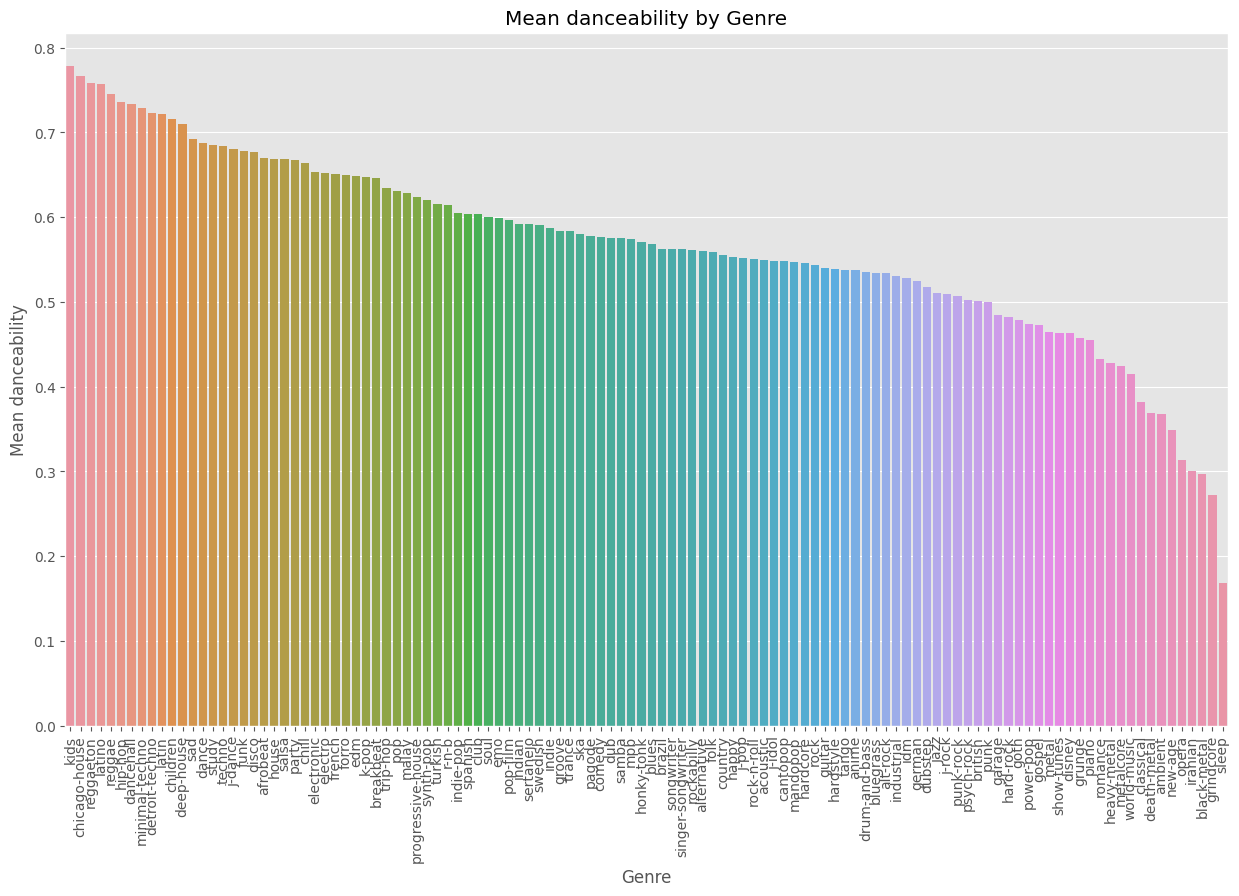

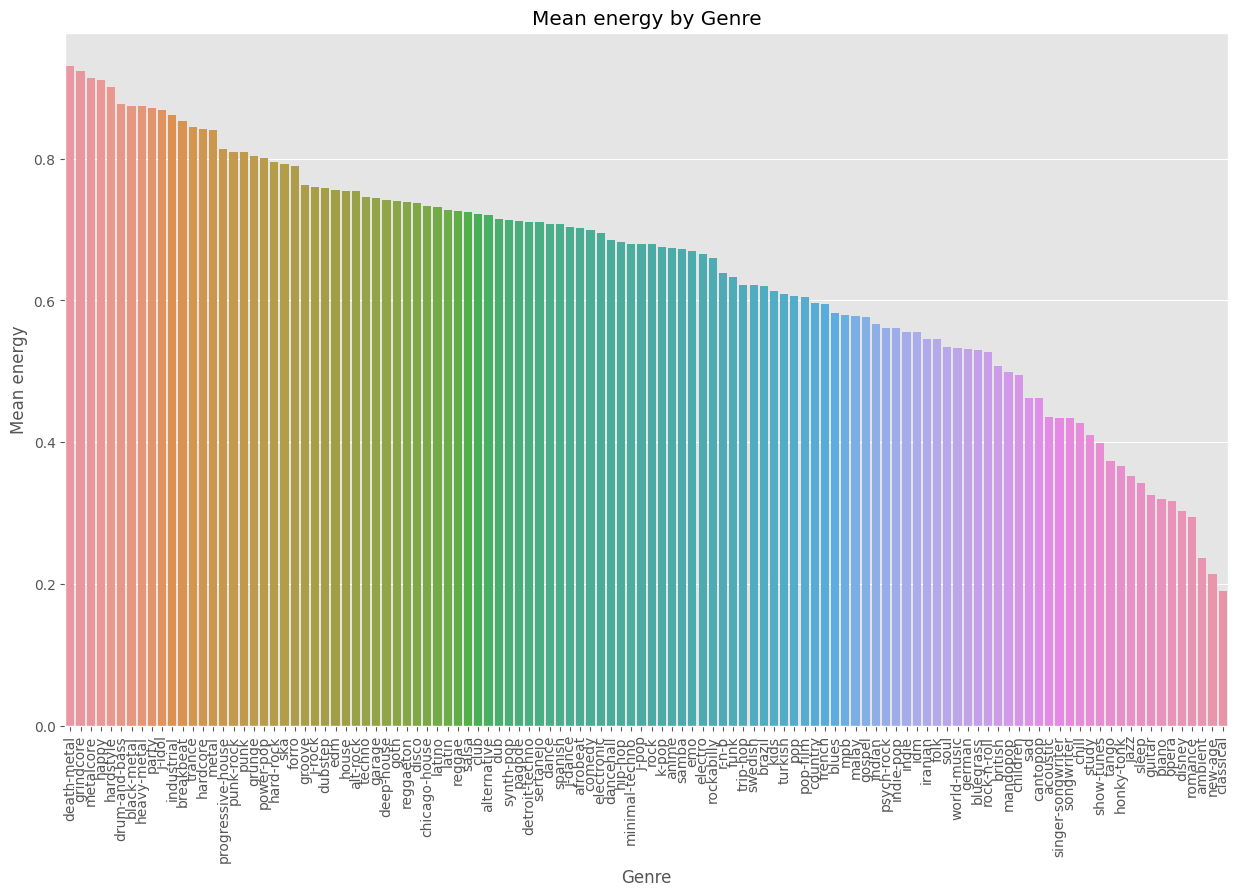

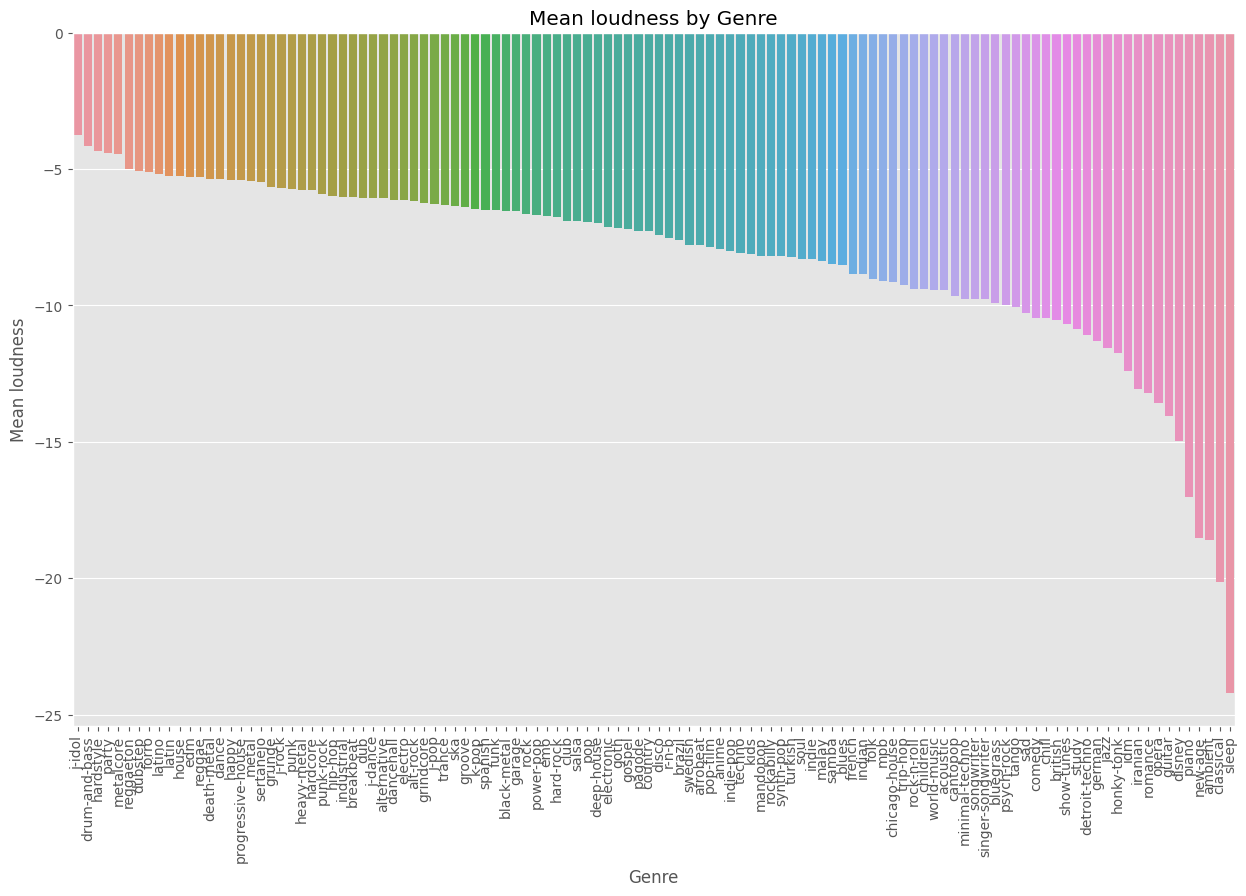

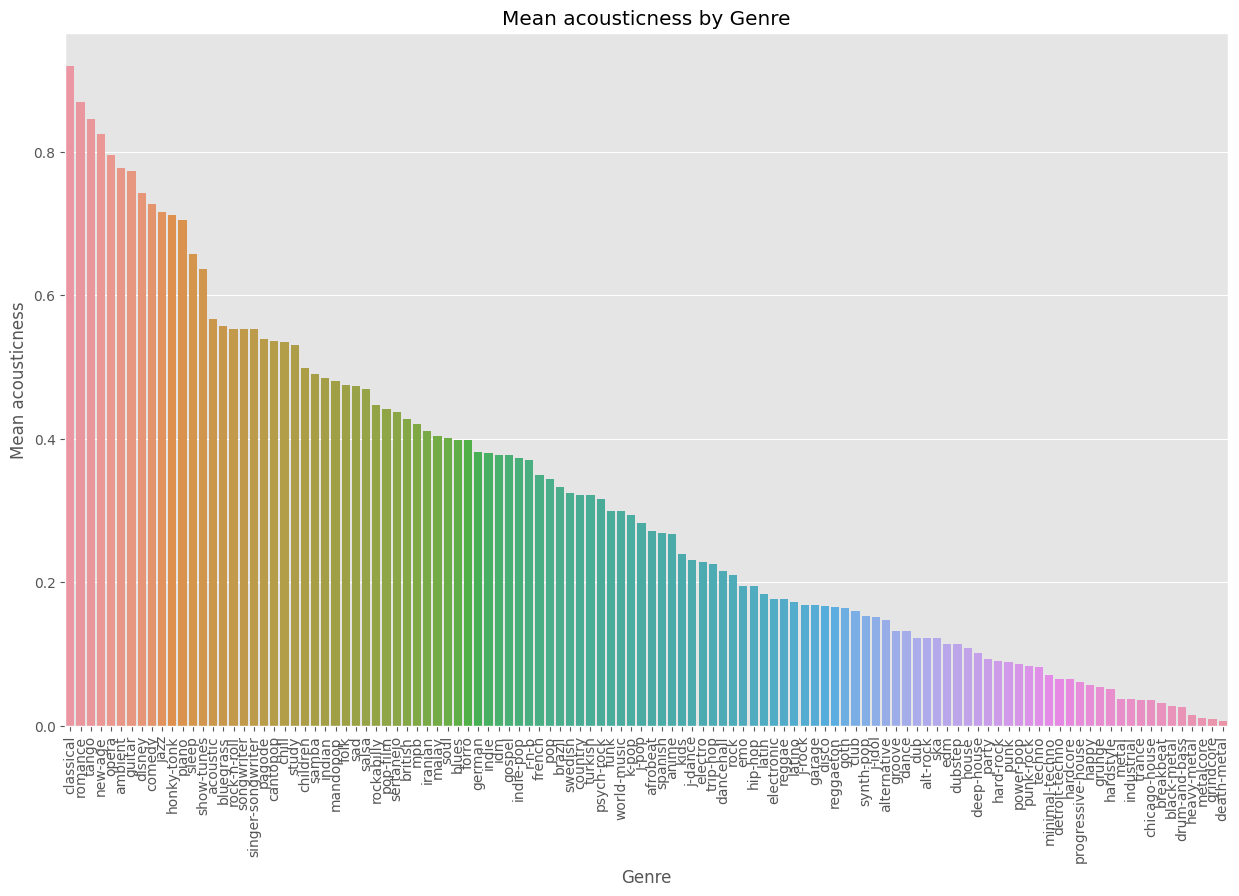

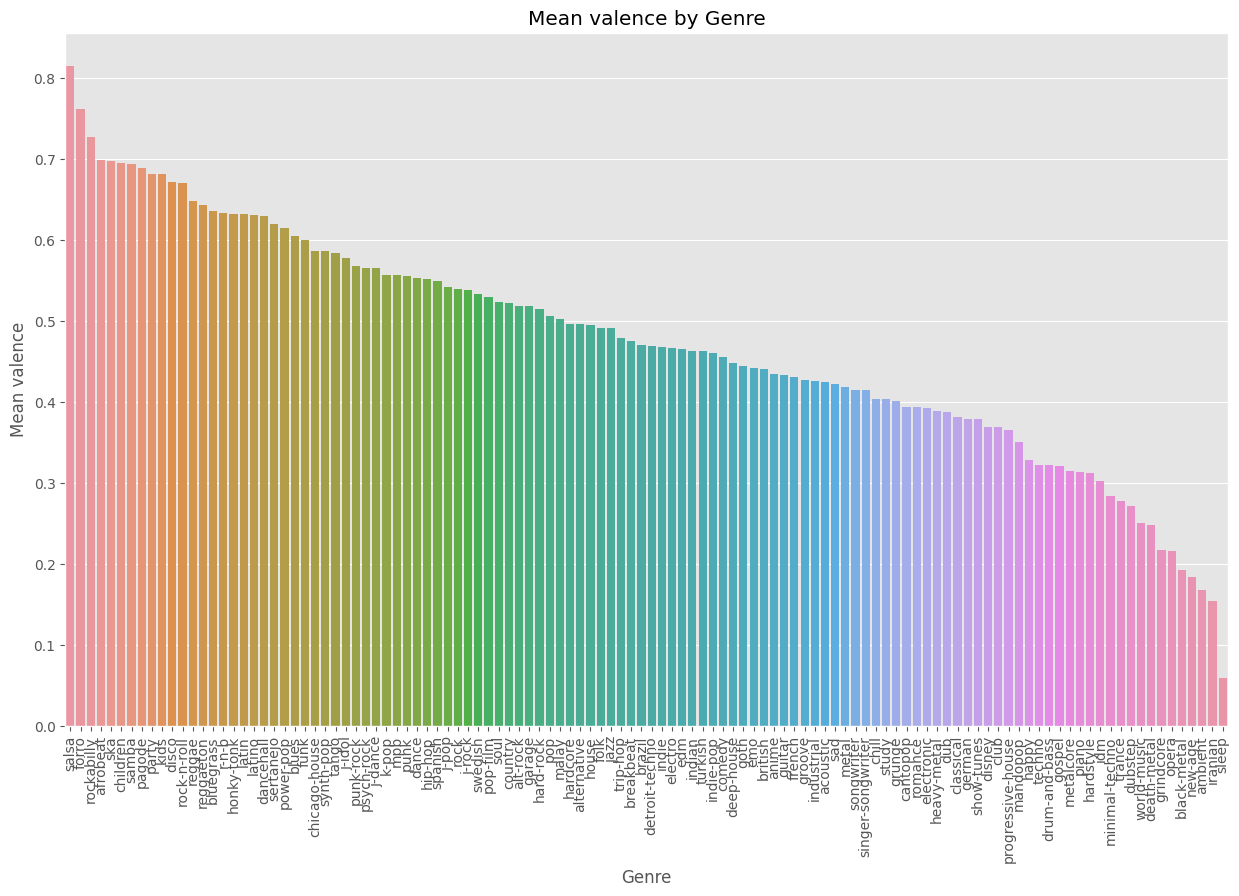

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('dataset.csv')

# List the characteristics you're interested in
characteristics = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']

# For each characteristic, plot the mean value per genre
for char in characteristics:
    plt.figure(figsize=(15, 9))
    genre_means = df.groupby('track_genre')[char].mean().sort_values(ascending=False)
    sns.barplot(x=genre_means.index, y=genre_means.values)
    plt.title(f'Mean {char} by Genre')
    plt.xlabel('Genre')
    plt.ylabel(f'Mean {char}')
    plt.xticks(rotation=90)
    plt.show()


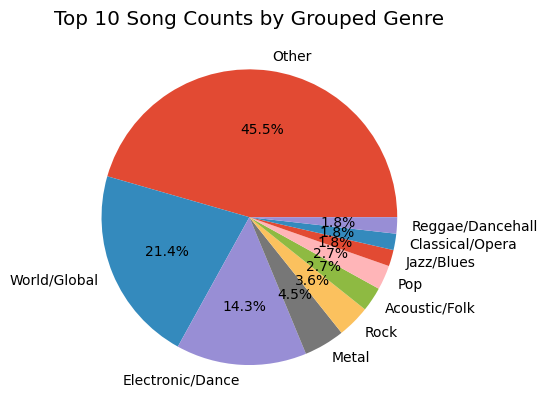

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")

genre_groups = {
    'Acoustic/Folk': ['acoustic', 'bluegrass', 'folk'],
    'Rock': ['alt-Rock', 'alternative', 'grunge', 'punk-rock', 'rock-n-roll'],
    'Electronic/Dance': ['breakbeat', 'chicago-house', 'deep-house', 'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'dubstep', 'EDM', 'electro', 'electronic', 'house', 'progressive-house', 'synth-pop', 'techno', 'trance', 'trip-hop'],
    'Pop': ['pop-film', 'pop', 'power-pop'],
    'Hip-Hop/Rap': ['hip-hop', 'rap', 'r-n-b'],
    'Metal': ['black-metal', 'death-metal', 'heavy-metal', 'metal', 'metalcore'],
    'Jazz/Blues': ['jazz', 'blues'],
    'Classical/Opera': ['classical', 'opera'],
    'Reggae/Dancehall': ['reggae', 'dancehall'],
    'World/Global': ['afrobeat', 'brazilian', 'brazil', 'french', 'german', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'k-pop', 'latin', 'latino', 'malay', 'mandarin', 'mandopop', 'new-age', 'pagode', 'salsa', 'samba', 'spanish', 'sertanejo', 'swedish', 'tango', 'turkish', 'world-music']
}

def get_genre_group(track_genre):
    for group, genres in genre_groups.items():
        if track_genre in genres:
            return group
    return 'Other'  # to handle genres that are not specified in your genre_groups

df['grouped_genre'] = df['track_genre'].apply(get_genre_group)
grouped_genre_counts = df['grouped_genre'].value_counts()
top10_grouped_genres = grouped_genre_counts.nlargest(10)

plt.style.use('ggplot')
plt.pie(top10_grouped_genres.values, labels=top10_grouped_genres.index, autopct='%1.1f%%')
plt.title('Top 10 Song Counts by Grouped Genre')

plt.show()
